# Group work


### Research questions: Do new ones!
Which attributes are affecting to player's value most?

How strongly salary and value are correlated?

Is there some league where salary compared to value is significantly higher than in others?

Top 5 salary to value players

What is the most expensive league and which one is the best?



### Importing libraries


In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

import pandas as pd #data frames (for storing data)
import numpy as np #scientific computing
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks



### Importing data

In [10]:
data = pd.read_csv('heart.csv')
data.head().style #Call the head() function to see how the dataset looks (.style() shows all columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Explanatory Data Analysis


In [4]:
data.info()  #No NAs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
# Print the dimensions of the original Hitters data (322 rows x 20 columns)
print("Dimensions of original data:", data.shape)
# From herer it can be seen that the data set is big, 18207 rows and 89 columns!

Dimensions of original data: (303, 14)


## Visualizing the data

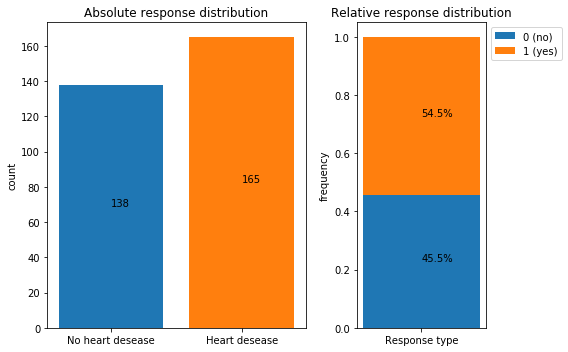

In [21]:
# plot response
keys, counts = np.unique(data.target, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[2,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['No heart desease', 'Heart desease'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Absolute response distribution') 
ax0 = plt.ylabel('count')
ax0 = plt.text(keys[0], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(keys[1], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Response type'], [counts_norm[0]], label='0 (no)')
ax1 = plt.bar(['Response type'], [counts_norm[1]], bottom=counts_norm[0], label='1 (yes)')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Relative response distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Response type'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Response type'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

age         96
sex         96
cp          96
trestbps    96
chol        96
fbs         96
restecg     96
thalach     96
exang       96
oldpeak     96
slope       96
ca          96
thal        96
target      96
dtype: int64 age         207
sex         207
cp          207
trestbps    207
chol        207
fbs         207
restecg     207
thalach     207
exang       207
oldpeak     207
slope       207
ca          207
thal        207
target      207
dtype: int64 age         138
sex         138
cp          138
trestbps    138
chol        138
fbs         138
restecg     138
thalach     138
exang       138
oldpeak     138
slope       138
ca          138
thal        138
target      138
dtype: int64 age         165
sex         165
cp          165
trestbps    165
chol        165
fbs         165
restecg     165
thalach     165
exang       165
oldpeak     165
slope       165
ca          165
thal        165
target      165
dtype: int64


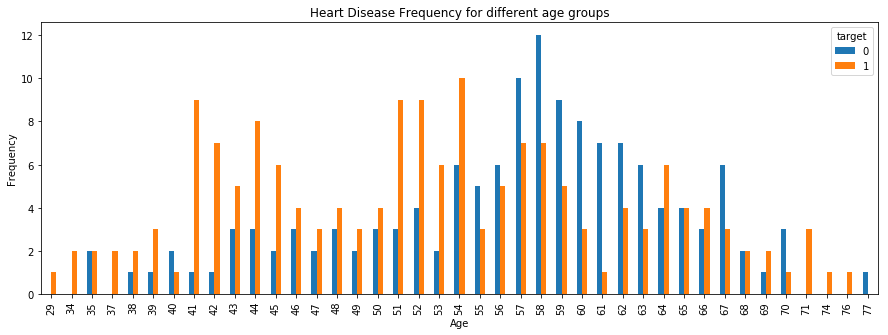

In [9]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart Disease Frequency for different age groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [178]:
data['Value'] = data['Value'].map(lambda x: x.lstrip('€'))
data["Value"] = data["Value"].str.replace("000000","M")

data["Value"]=data[data["Value"].str.contains(".",regex = False)]["Value"].apply(lambda x: x +"0")

print(data["Value"])

0        110.5M0
1            NaN
2        118.5M0
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11        76.5M0
12           NaN
13           NaN
14           NaN
15           NaN
16        83.5M0
17           NaN
18           NaN
19        53.5M0
20        51.5M0
21           NaN
22           NaN
23        64.5M0
24           NaN
25           NaN
26        69.5M0
27        59.5M0
28        69.5M0
29           NaN
          ...   
18177        NaN
18178        NaN
18179        NaN
18180        NaN
18181        NaN
18182        NaN
18183        NaN
18184        NaN
18185        NaN
18186        NaN
18187        NaN
18188        NaN
18189        NaN
18190        NaN
18191        NaN
18192        NaN
18193        NaN
18194        NaN
18195        NaN
18196        NaN
18197        NaN
18198        NaN
18199        NaN
18200        NaN
18201        NaN
18202        NaN
18203        NaN
18204        N

In [186]:
data["Value"].dropna()
data['Value']=data['Value'].str.extract('(\d+)',expand=True).astype(int)
print(data["Value"])

ValueError: cannot convert float NaN to integer

In [169]:
ind = pd.Index(['Mouse', 'dog', 'house and parrot', '23.0', np.NaN])
ind.str.contains('23', regex=False)
#Index([False, False, False, True, nan], dtype='object')

Index([False, False, False, True, nan], dtype='object')

In [132]:
s = pd.Series(["aa", "aba", 2, 3, 4])
print(s.replace("a", "sd"))
print(s)

0     aa
1    aba
2      2
3      3
4      4
dtype: object
0     aa
1    aba
2      2
3      3
4      4
dtype: object
